## Autores:

Luiza Lober de Souza Piva, nUSP: 9302292

Ricardo Camacho Tetti, nUSP: 10728098

In [ ]:
#Configurações

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import random

#puxar arquivos do GitHub
import requests as rq
from io import BytesIO

#Ignora alguns avisos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#semente aleatória
set_seed = 42

# Redes a serem usadas

In [ ]:
def PlotLargeGraph(big_graph):
    pos=nx.spring_layout(big_graph)
    nx.draw(big_graph, with_labels = False, node_size=50, node_color = "darkblue", edgecolors = "lightgray", alpha=0.2, font_size=16, pos = pos)
    plt.show(True)

### (Com direção) G1: Rede de confiança de médicos

Uma rede que mostra as relações de confiança entre médicos de quatro cidades do meio-oeste dos Estados Unidos. As direções indicam que um dado nó *i* confia ou pede conselhos para um nó *j*.

Descrição do arquivo:

*    241 vértices/nós (médicos);
*    1098 conexões/arestas (confiança);
*    Não há loops;
*    Rede com pesos (weighted), **com direção**.

Rede disponível em https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.moreno_innovation.tar.bz2

Mais informações: http://www.jstor.org/stable/2785979

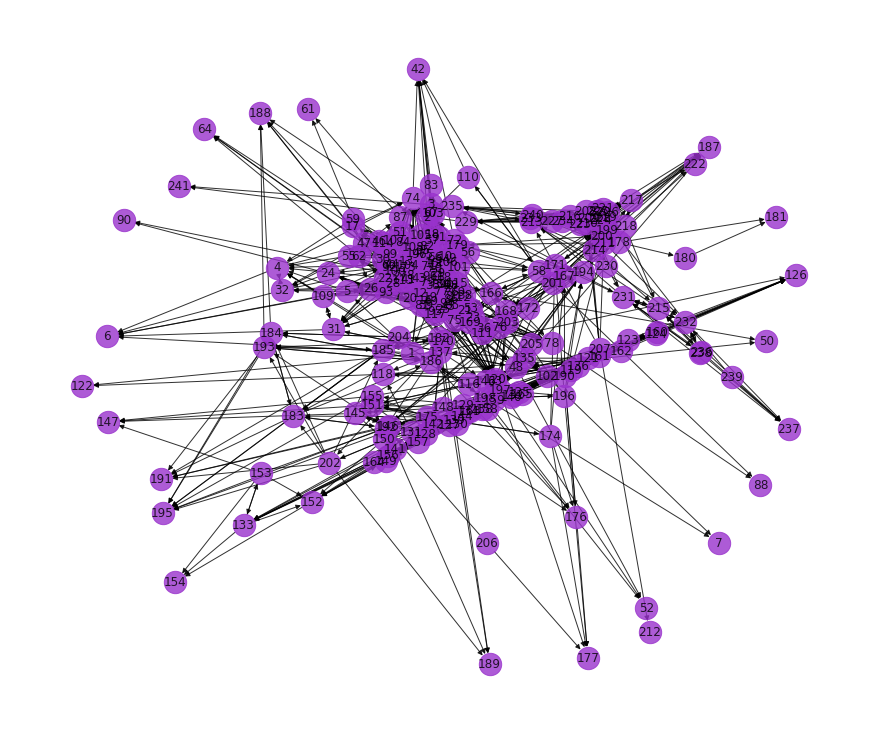

In [ ]:
#Lê o grafo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/out.moreno_innovation_innovation.txt'
data = rq.get(url).content
G1 = nx.read_edgelist(BytesIO(data), create_using=nx.DiGraph())

#Grafica a representação gráfica do grafo G1
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="darkorchid", node_size=500, with_labels=True, alpha=0.8)

### (Com direção) G2: Centrality literature network

Uma rede descrevendo citações dentro do assunto "centralidade em ciência de redes complexas" dos anos 1948 a 1979.

Descrição do arquivo:

*   129 vértices/nós (publicações);
*   613 conexões/arestas (citações apontando para o artigo citado);
*   Não há loops;
*   Rede com pesos (weighted)
*   Valores das linhas: 
   *  1 - citações simples, 
   *  2 - citações duplas, o que é possível se o artigo citado ou que faz a citação se refere a dois artigos combinados em um único vértice


Rede disponível em [http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm](http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm)

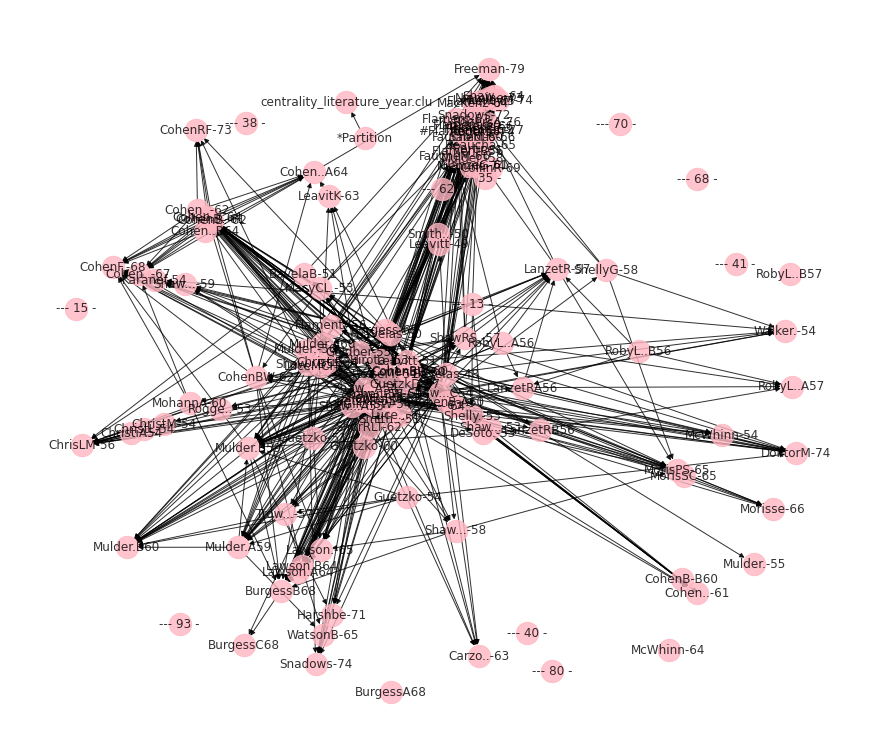

In [ ]:
 #Lê a rede
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/centrality_literature.paj'
data = rq.get(url).content
G2= nx.read_pajek(BytesIO(data))

#Grafica a representação gráfica do grafo G2
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="lightpink", node_size=500, with_labels=True, alpha=0.8)

### (Sem direção) G3: Moviegalaxies - Social Networks in Movies - no.828

Rede no. 828 do dataset, representando as interações cena-a-cena dos personagens de Titanic.

Descrição do arquivo:

*    72 vértices/nós (personagens);
*    547 conexões/arestas (interações na mesma cena);
*    Não há loops;
*    Rede com pesos (weighted), **sem direção**.


Rede disponível em [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3)

Maiores informações (metadata): [https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0)

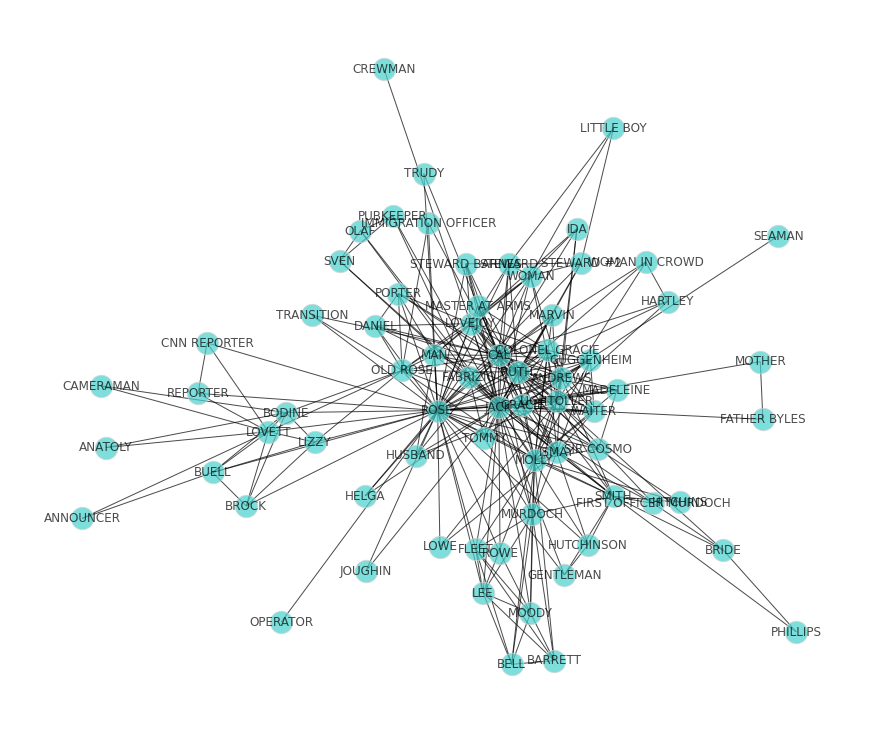

In [ ]:
#Lê o arquivo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-2/828.gexf'
data = rq.get(url).content
G3 = nx.read_gexf(BytesIO(data), relabel=True)

#Grafica a representação gráfica do grafo G3
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="mediumturquoise", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

# Q1: distribuição de probabilidade do grau

Calcular e plotar P(k), i.e. a distribuição de probabilidade do grau. $P(k)$ representa a probabilidade de que um vértice possua grau igual a k. Mostre este gráfico em escala log-log. Para as redes direcionadas, mostrar $P(k_{in})$ e $P(k_{out})$ (distribuição dos graus de entrada e saída)

In [ ]:
def degree_distribution(G, direcionada=False):
    if (direcionada):
      vk_in = dict(G.in_degree()) 
      vk_in = list(vk_in.values())  
      vk_in = np.array(vk_in)
      maxk = np.max(vk_in)
      mink = np.min(vk_in)
      kvalues_in = np.arange(0,maxk+1) 
      Pk_in = np.zeros(maxk+1)
      for k in vk_in:
          Pk_in[k] = Pk_in[k] + 1
      Pk_in = Pk_in/sum(Pk_in)

      vk_out = dict(G.out_degree())
      vk_out = list(vk_out.values())  
      vk_out = np.array(vk_out)
      maxk = np.max(vk_out)
      mink = np.min(vk_out)
      kvalues_out = np.arange(0,maxk+1) 
      Pk_out = np.zeros(maxk+1)
      for k in vk_out:
          Pk_out[k] = Pk_out[k] + 1
      Pk_out = Pk_out/sum(Pk_out)

      return kvalues_in, kvalues_out, Pk_in, Pk_out

    else:
      vk = dict(G.degree())    
      vk = list(vk.values())  
      vk = np.array(vk)
      maxk = np.max(vk)
      mink = np.min(vk)
      kvalues= np.arange(0,maxk+1) 
      Pk = np.zeros(maxk+1)
      for k in vk:
          Pk[k] = Pk[k] + 1
      Pk = Pk/sum(Pk)

      return kvalues,Pk

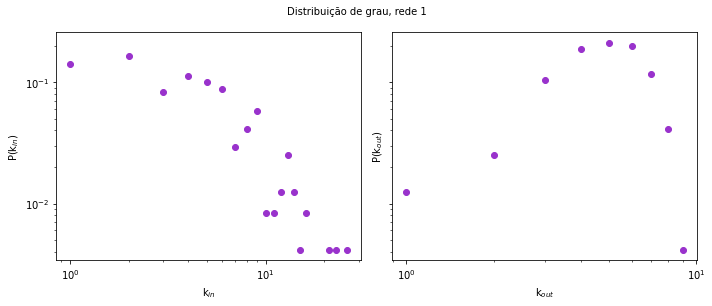

In [ ]:
#Rede 1, direcionada
ks_in, ks_out, Pk_in, Pk_out = degree_distribution(G1, direcionada=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

axs[0].plot(ks_in,Pk_in,'o', color='darkorchid')
axs[0].set_ylabel('P(k$_{in}$)')
axs[0].set_xlabel(r'k$_{in}$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(ks_out,Pk_out,'o', color='darkorchid')
axs[1].set_ylabel('P(k$_{out}$)')
axs[1].set_xlabel(r'k$_{out}$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

fig.tight_layout()
fig.text(0.5, 1.025, 'Distribuição de grau, rede 1', ha='center')
plt.show()

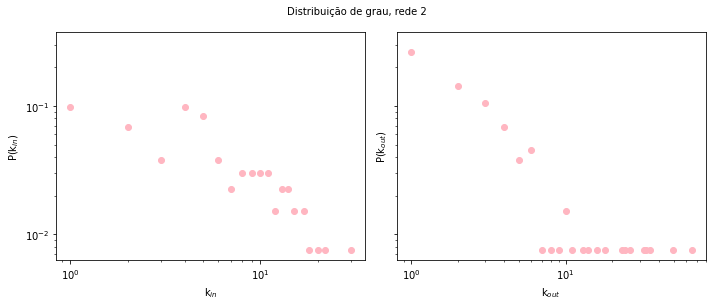

In [ ]:
#Rede 2, direcionada
ks_in, ks_out, Pk_in, Pk_out = degree_distribution(G2, direcionada=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

axs[0].plot(ks_in,Pk_in,'o', color='lightpink')
axs[0].set_ylabel('P(k$_{in}$)')
axs[0].set_xlabel(r'k$_{in}$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(ks_out,Pk_out,'o', color='lightpink')
axs[1].set_ylabel('P(k$_{out}$)')
axs[1].set_xlabel(r'k$_{out}$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

fig.tight_layout()
fig.text(0.5, 1.025, 'Distribuição de grau, rede 2', ha='center')
plt.show()

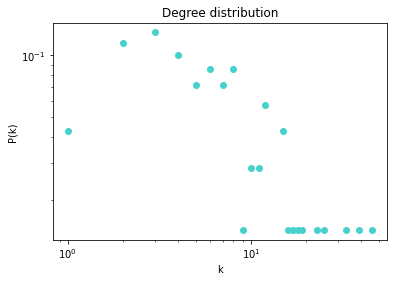

In [ ]:
#Rede 3 (não direcionada)
ks, Pk = degree_distribution(G3, direcionada=False)

fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'o', color='mediumturquoise')
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Degree distribution")
#plt.savefig('degree_dist.eps') #save the figure into a file
plt.show()

# Q2: centralidade de autovetores

Calcular a centralidade de autovetores para todas as redes. Qual a correlação (Pearson) entre a centralidade de autovetores e o grau? Mostre o valor da correlação e os respectivos scatter-plots (eixo-x = grau do vértice, eixo y = centralidade de auto-vetor 
do vértice).

In [ ]:
#Rede 1
EC1 = dict(nx.eigenvector_centrality(G1, max_iter = 1000))
EC1 = list(EC1.values())
av_EC1 = np.mean(EC1)
print('Centralidade de autovetor média para G1', av_EC1)

Centralidade de autovetor média para G1 0.016553251145772087


In [ ]:
vk1 = dict(G1.degree())
vk1 = list(vk1.values())
pearson = sp.stats.pearsonr(EC1,vk1)
print('Correlação e valor p, G1:', pearson)

Correlação e valor p, G1: (0.28727713674885536, 5.830154856806774e-06)


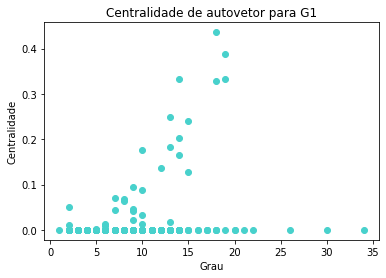

In [ ]:
vk1 = dict(G1.degree())
vk1 = list(vk1.values())

plt.figure(figsize=(6,4))
plt.plot(vk1,EC1,'o', color='mediumturquoise')
plt.title("Centralidade de autovetor para G1")
plt.ylabel("Centralidade")
plt.xlabel("Grau")

plt.show()

--------------------------------------------------------------------------------

In [ ]:
#Rede 2

G2 = nx.DiGraph(G2)
EC2 = dict(nx.eigenvector_centrality(G2, max_iter = 1000))

EC2 = list(EC2.values())
av_EC2 = np.mean(EC2)
print('Centralidade de autovetor média para G2:', av_EC2)

Centralidade de autovetor média para G2: 0.008040380920910094


In [ ]:
vk2 = dict(G2.degree())
vk2 = list(vk2.values())
pearson = sp.stats.pearsonr(EC2,vk2)
print('Correlação e valor p, G2:', pearson)

Correlação e valor p, G2: (0.1764701344082432, 0.042958020846437385)


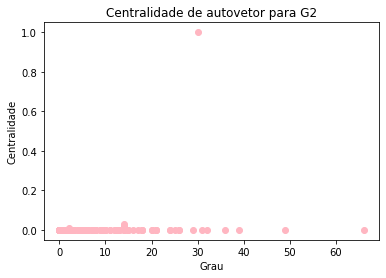

In [ ]:
vk2 = dict(G2.degree())
vk2 = list(vk2.values())

plt.figure(figsize=(6,4))
plt.plot(vk2,EC2,'o', color='lightpink')
plt.title("Centralidade de autovetor para G2")
plt.ylabel("Centralidade")
plt.xlabel("Grau")
plt.show()

--------------------------------------------------------------------------------

In [ ]:
#Rede 3

EC3 = dict(nx.eigenvector_centrality(G3, max_iter = 1000))

EC3 = list(EC3.values())
av_EC3 = np.mean(EC3)
print('Centralidade de autovetor média para G3:', av_EC3)

Centralidade de autovetor média para G3: 0.09068994150150204


In [ ]:
vk3 = dict(G3.degree())
vk3 = list(vk3.values())
pearson = sp.stats.pearsonr(EC3,vk3)
print('Correlação e valor p, G3:', pearson)

Correlação e valor p, G3: (0.936606301476015, 1.0980963354498311e-32)


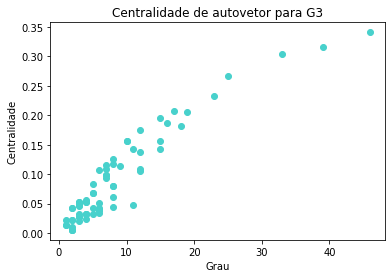

In [ ]:
vk3 = dict(G3.degree())
vk3 = list(vk3.values())

plt.figure(figsize=(6,4))
plt.plot(vk3,EC3,'o', color='mediumturquoise')
plt.title("Centralidade de autovetor para G3")
plt.ylabel("Centralidade")
plt.xlabel("Grau")
plt.show()

# Q3: centralidade nula em redes direcionadas

Para as redes direcionadas, verifique se existem vértices com centralidade nula mesmo quando há conexões de entrada.

In [ ]:
#No caso de redes direcionadas, há diferença entre a centralidade de entrada e de saída.

###Vamos testar para a rede 1:

centralidade_entrada = nx.in_degree_centrality(G1)
#print(centralidade_entrada)

centralidade_saida = nx.out_degree_centrality(G1)
#print(centralidade_saida)

print('Rede 1:')
print('Os dois são iguais?', centralidade_entrada == centralidade_saida)

#Agora, vamos checar os valores nulos, se existirem
nos_cent_nula_1 = []
nos_cent_nula_2 = []

for keys in centralidade_entrada:
    if centralidade_entrada[keys] == 0:
      nos_cent_nula_1.append(keys)

for keys in centralidade_saida:
    if centralidade_saida[keys] == 0:
      nos_cent_nula_2.append(keys)

print('Nós com centralidade nula de entrada:', len(nos_cent_nula_1))
print('Nós com centralidade nula de saída:', len(nos_cent_nula_2))

Rede 1:
Os dois são iguais? False
Nós com centralidade nula de entrada: 22
Nós com centralidade nula de saída: 24


In [ ]:
### Agora, para a rede 2:

centralidade_entrada = nx.in_degree_centrality(G2)
#print(centralidade_entrada)

centralidade_saida = nx.out_degree_centrality(G2)
#print(centralidade_saida)

print('Rede 2:')
print('Os dois são iguais?', centralidade_entrada == centralidade_saida)

#Agora, vamos checar os valores nulos, se existirem
nos_cent_nula_1 = []
nos_cent_nula_2 = []

for keys in centralidade_entrada:
    if centralidade_entrada[keys] == 0:
      nos_cent_nula_1.append(keys)

for keys in centralidade_saida:
    if centralidade_saida[keys] == 0:
      nos_cent_nula_2.append(keys)

print('Nós com centralidade nula de entrada:', len(nos_cent_nula_1))
print('Nós com centralidade nula de saída:', len(nos_cent_nula_2))

Rede 2:
Os dois são iguais? False
Nós com centralidade nula de entrada: 41
Nós com centralidade nula de saída: 26


# Q4: grau vs acessibilidade

Para as redes sem direção, mostrar o scatter plot de grau (i.e. número de vizinhos) vs. acessibilidade (calculada) no nível hierárquico $h=1$. 

### Acessibilidade invariante por caminho

**Acessibilidade**: segundo [este artigo](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.90.032812), podemos tomar a acessibilidade generalizada para um nó i como:

$$\alpha_h (i) = exp \left( - \sum_j \textbf{P}(i,j) \log \textbf{P}(i,j) \right)$$

onde $\textbf{P}$ é a probabilidade de transição entre quaisquer pares de vértices a partir de um caminho aleatório, calculada como

$$\textbf{P} = \frac{\textbf{W}}{e}$$
onde a matriz $\textbf{W}$ é uma matriz de valores médios de visitas que um dado nó receberá no caminho aleatório.

In [ ]:
#Aqui, fazemos uma implementação independente da distância percorrida

def acc(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    N = len(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = sp.linalg.expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*np.log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc

    return vacc

Abaixo, o gráfico pedido:

In [ ]:
#Aqui, extrai os graus de cada nó de G3
ks_G3 = (dict(G3.degree())).values()

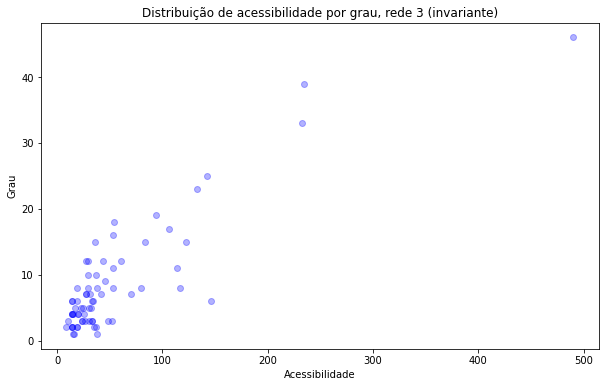

In [ ]:
aces_G3_alt = acc(G3)

fig = plt.figure(figsize=(10, 6))
plt.plot(aces_G3_alt, ks_G3,'bo', alpha=0.3)
plt.xlabel("Acessibilidade")
plt.ylabel("Grau")
plt.title('Distribuição de acessibilidade por grau, rede 3 (invariante)', loc='center')
plt.show()

### Acessibilidade dependente do caminho

Também podemos tomar a acessibilidade dependente do tamanho dos caminhos aleatórios percorridos, isto é:

$$\alpha_h (i) = exp \left( - \sum_j P^{(h)}(i,j) \log P^{(h)}(i,j) \right)$$

onde $P^{(h)}(i,j)$ é a probabilidade de alcançar o nó $j$ partindo de $i$ num caminho aleatório de comprimento $h$, com $1 \leqslant \alpha_h (i) \leqslant N$.

\
Vamos considerar o nível hierárquico $h=1$ para o primeiro caso, mas abaixo segue também o gráfico para os segundos vizinhos ($h=2$).

In [ ]:
def acc_h1(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    N = len(G)
    P = np.zeros((N,N), dtype = 'float')
    graph = nx.convert_node_labels_to_integers(G, first_label=0)

    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/(len(list(graph.neighbors(i))))
                  #-> a probabilidade de alcançar um nó j qualquer é dada por 1/vizinhos

    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P[i,j] > 0):
                acc = acc + P[i,j]*np.log(P[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc

    return vacc

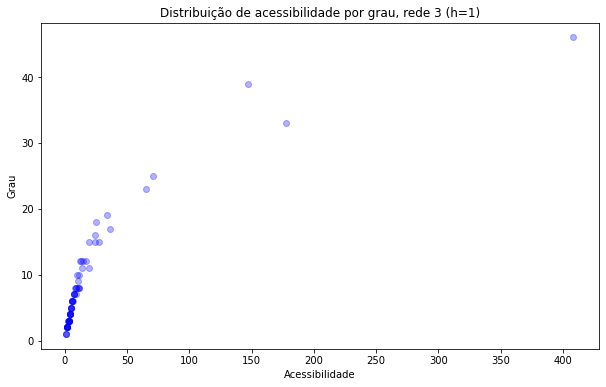

In [ ]:
aces_G3_h1 = acc_h1(G3)

fig = plt.figure(figsize=(10, 6))
plt.plot(aces_G3_h1, ks_G3,'bo', alpha=0.3)
plt.xlabel("Acessibilidade")
plt.ylabel("Grau")
plt.title('Distribuição de acessibilidade por grau, rede 3 (h=1)', loc='center')
plt.show()

Se quiséssemos considerar os segundos vizinhos,

In [ ]:
def get_second_neighbors(graph, node) -> list:
    """
    Returns a list of unique second neighbors for a given node in the graph.
    From https://stackoverflow.com/questions/11174122/neighbors-of-second-order
    """

    graph = nx.convert_node_labels_to_integers(graph, first_label=0)
    secnd_nb = [second_neighbor 
            for first_neighbor in graph.neighbors(node)
            for second_neighbor in graph.neighbors(first_neighbor) 
            if second_neighbor != node]

    return list(set(secnd_nb)) #remove valores duplicados antes de retornar

def f(seq): 
  return list(set(seq))

In [ ]:
def acc_h2(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    N = len(G)
    P = np.zeros((N,N), dtype = 'float')
    graph = nx.convert_node_labels_to_integers(G, first_label=0)

    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/(len( get_second_neighbors(G, i) ))
                #aqui, tomamos P = 1/segundos_vizinhos

    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P[i,j] > 0):
                acc = acc + P[i,j]*np.log(P[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc

    return vacc

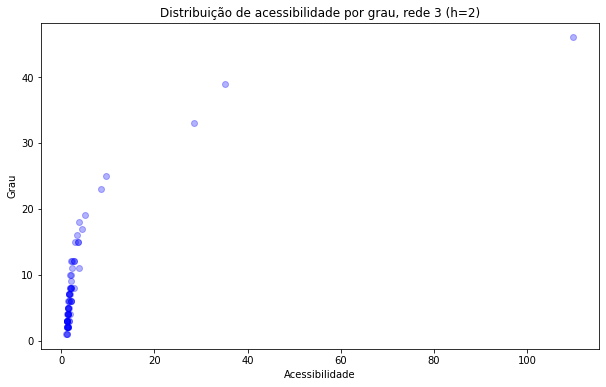

In [ ]:
aces_G3_h2 = acc_h2(G3)

fig = plt.figure(figsize=(10, 6))
plt.plot(aces_G3_h2, ks_G3,'bo', alpha=0.3)
plt.xlabel("Acessibilidade")
plt.ylabel("Grau")
plt.title('Distribuição de acessibilidade por grau, rede 3 (h=2)', loc='center')
plt.show()

# Q5: vertices de baixa acessibilidade

**A partir de 1), mostrar exemplos de vértices que possuam acessibilidade muito menor que o número de vértices.** 

Do primeiro gráfico, onde consideramos acessibilidade invariante por caminho, podemos perceber que existe uma concentração de nós com grau e acessibilidade similar em torno de 10, com alguns nós apresentando grau maior que a acessibilidade nesses casos, mas com esta diferença sendo pequena.

Agora, quando se considera o caminho no cálculo de acessibilidade, podemos ver nós de grau hierárquico mais alto (h=2, acima) apresentando baixa acessibilidade (grau 20, acessibilidade $<10$).

# Q6: correlação e centralidade de Katz

Calcule a correlação de rank (Spearman correlation coeficiente) obtida entre o grau e a centralidade Katz, para qualquer valor adequado de alpha (i.e. um alpha que garante convergência da medida de centralidade).

In [ ]:
#Calculando o ranque (mesma da Q2)

#Rede G3
vk_G3 = dict(G3.degree())
vk_G3 = list(vk_G3.values())

EC_G3 = dict(nx.eigenvector_centrality(G3, max_iter = 1000))
EC_G3 = list(EC_G3.values())

In [ ]:
from scipy.sparse.linalg import eigs
from numpy import linalg as LA

adjacency = nx.adjacency_matrix(G3)

eigen = eigs(adjacency)
lambda_max = LA.norm(max(eigen[0]))

#O parâmetro alfa deve ser estritamente menor do que o inverso do maior autovalor
#da matriz de adjacência para que o algoritmo convirja. 
alpha = 1/lambda_max 

#Calculando a centralidade Katz
#--> parâmetros padrão em alpha, beta, max_iter e normalização
#O cálculo converge para estes parâmetros.

katz_G3 = nx.katz_centrality(G3, alpha=alpha, beta=1.0, max_iter=1000, normalized=True)
katz_G3 = list(katz_G3.values())

/tmp/ipykernel_9709/2035362874.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency = nx.adjacency_matrix(G3)


In [ ]:
#Correlações:
vk = dict(G3.degree())
vk = list(vk.values()) 

spearman_G3 = sp.stats.spearmanr(vk, katz_G3)
print('Correlação e valor p, rede G3:', spearman_G3)

Correlação e valor p, rede G3: SpearmanrResult(correlation=0.9809986394939466, pvalue=3.672146449849057e-50)
